# **Project Milestones: Data Preprocessing**

---

**Group 1**

## 1. Data Collection and Understanding

### 1.1 Project goals and objectives
Breast cancer ranks as one of the most common cancers among women globally, with diverse influencing factors. Early detection remains crucial, greatly enhancing survival rates. While numerous studies have explored pathogenesis and environmental influences, recent research calls for renewed focus on predictive analytics and risk assessment . Leveraging data from the SEER Program, this project seeks to elucidate influential factors through data visualizations that aid healthcare decision-making and personalization of patient care.

### 1.2 Data Sources and Description
The SEER Breast Cancer Dataset encompasses 15 attributes for patients diagnosed with ductal and lobular carcinoma between 2006-2010, totaling 4024 records. Attributes include age, race, marital status, tumor stages and size, hormone receptor status, lymph node data, and survival months. Data will be analyzed to provide actionable insights for improved patient outcomes.
Data link: https://ieee-dataport.org/open-access/seer-breast-cancer-data


### 1.3 Data exploration

In [ ]:
# Import necessary dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
url = "https://raw.githubusercontent.com/XGao12321/Data-Visualization/main/SEER%20Breast%20Cancer%20Dataset%20.csv"
df = pd.read_csv(url)

In [ ]:
# Visualize the data structure and detailed information.
# Display the top 5 rows of the data set

display(df.head())

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [ ]:
# Display detailed information about the dataset, including data shape, data types, and column information.
display(df.info())

# Display how many columns and how many rows in the data set
print("-------------------------------------------------------")
print("Count of Rows and Columns")
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

None

-------------------------------------------------------
Count of Rows and Columns


(4024, 16)

In [ ]:
# Display the summary statistics of the numerical columns in data, including the mean, median, and numeric information.
display(df.describe())

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.00,0.0,4024.00,4024.00,4024.00,4024.00
mean,53.97,NaN,30.47,14.36,4.16,71.30
std,8.96,NaN,21.12,8.10,5.11,22.92
min,30.00,NaN,1.00,1.00,1.00,1.00
25%,47.00,NaN,16.00,9.00,1.00,56.00
50%,54.00,NaN,25.00,14.00,2.00,73.00
75%,61.00,NaN,38.00,19.00,5.00,90.00
max,69.00,NaN,140.00,61.00,46.00,107.00


### 1.4 Visualize the numeric data and object data

1.4.1 The numeric data

In [ ]:
# Import necessay dependencies
import matplotlib.pyplot as plt
import seaborn as sns

Scatter plots and histograms illustrate the distribution and relationships within the numeric data of the dataset


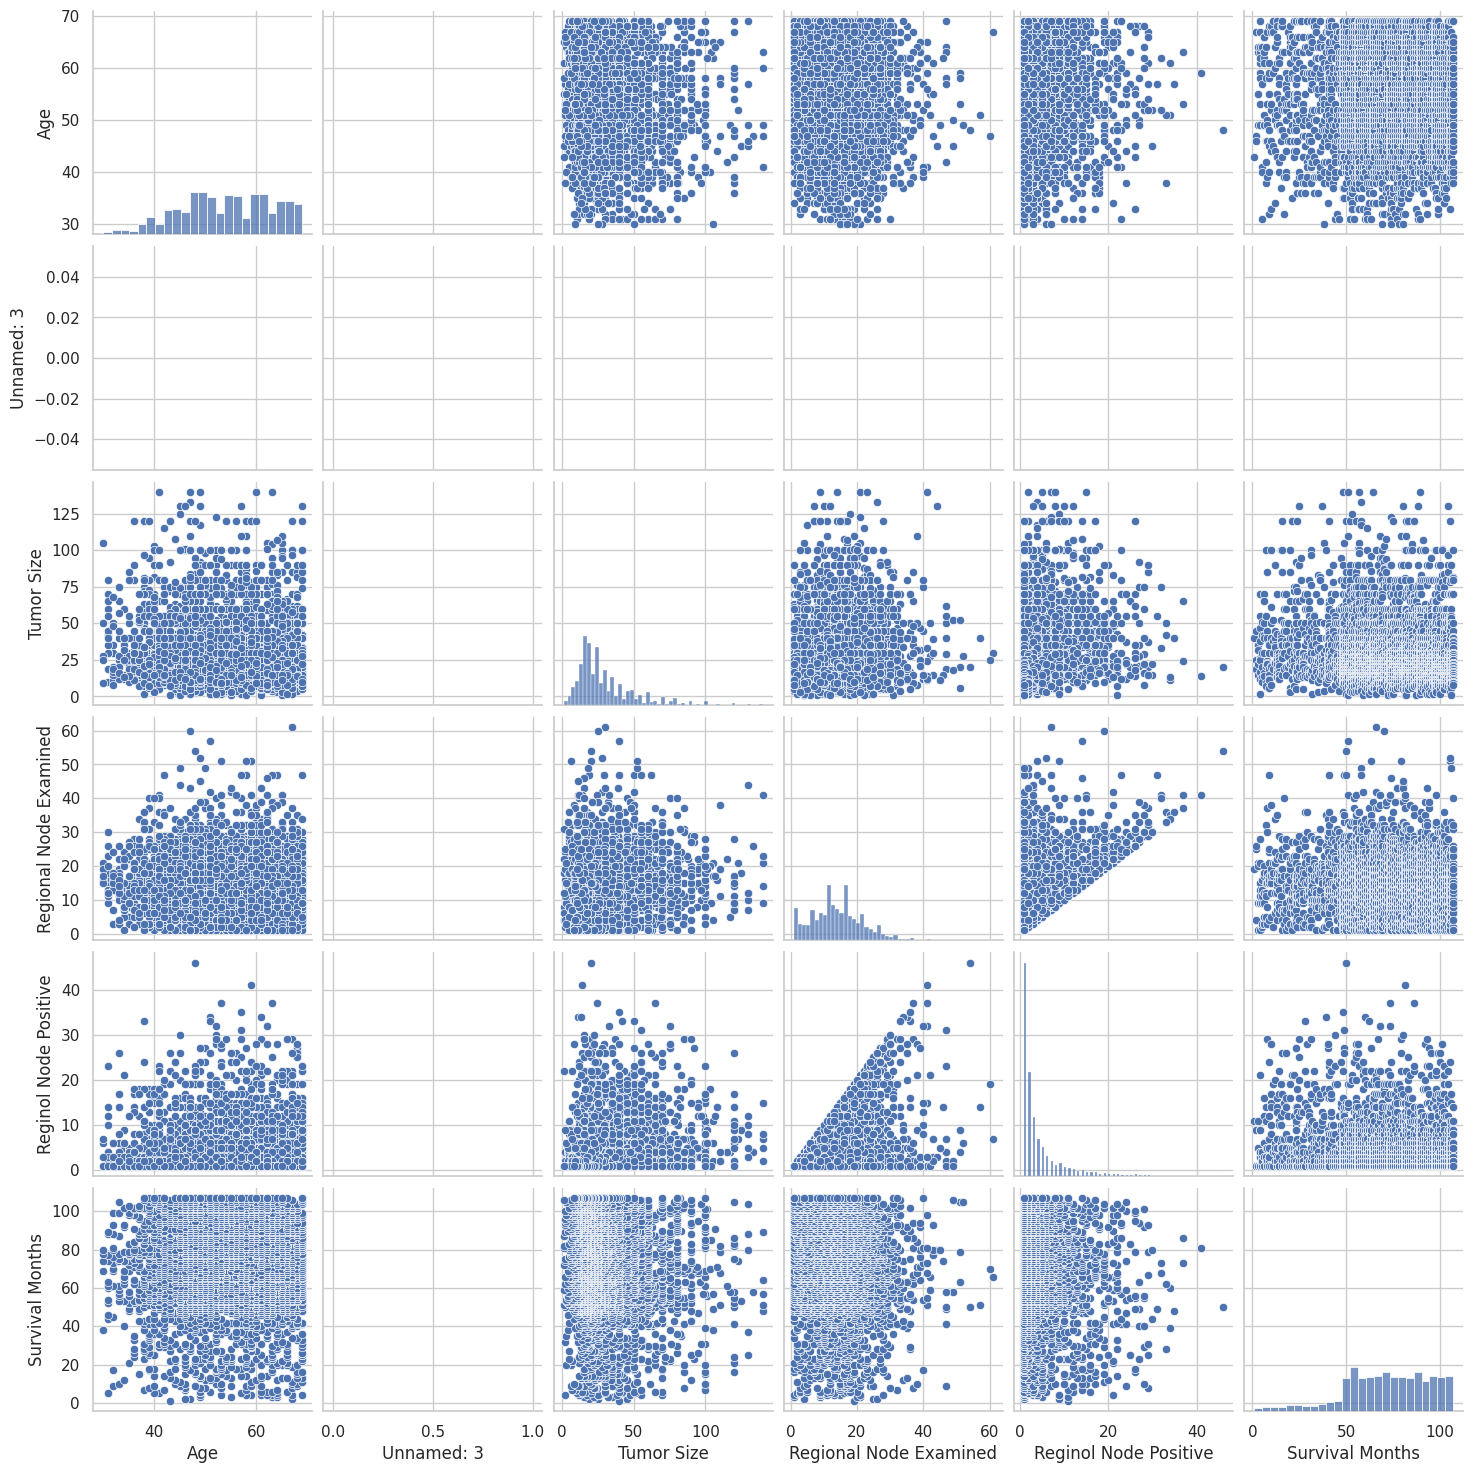

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# display(numeric_columns)
# Scatter plot matrix
print("Scatter plots and histograms illustrate the distribution and relationships within the numeric data of the dataset")
pairplot = sns.pairplot(df[numeric_columns])
# Save the figure
pairplot.savefig('scatter_plot_matrix.png', dpi=300)

plt.show()


Box plot illustrate the distribution within the numeric data of the dataset


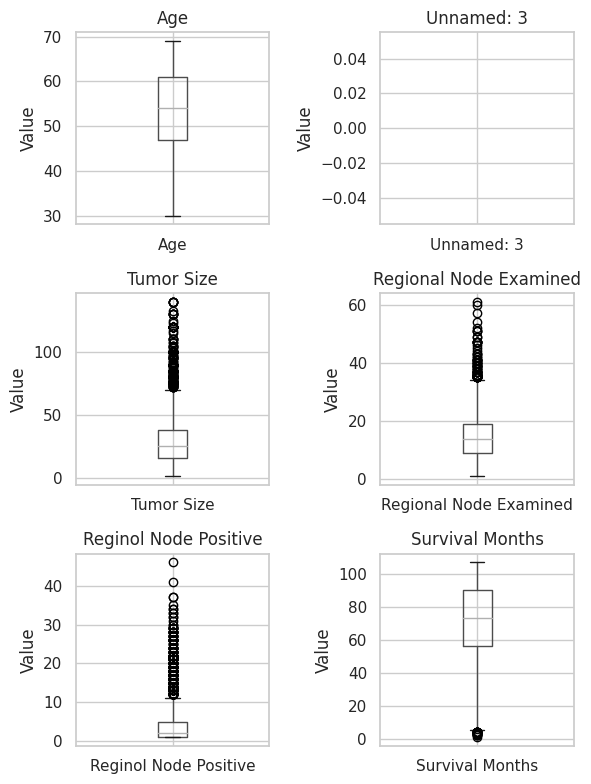

In [ ]:
# Box plots for each numeric column
# Use subplot to show all the numeric column data
num_subplots =  6

# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 2, figsize=(6, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot box plots for each column in a subplot
for i, column_name in enumerate(numeric_columns):
    if i < num_subplots:
        row = i // 3
        col = i % 3
        df.boxplot(column=column_name, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_ylabel('Value')

# Hide any unused subplots
for i in range(len(numeric_columns), num_subplots):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure with specified DPI
fig.savefig('box_plots.png', dpi=300)

# Display the plots
print("Box plot illustrate the distribution within the numeric data of the dataset")
plt.show()

<ipython-input-91-16bcf8c7dbde>:28: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



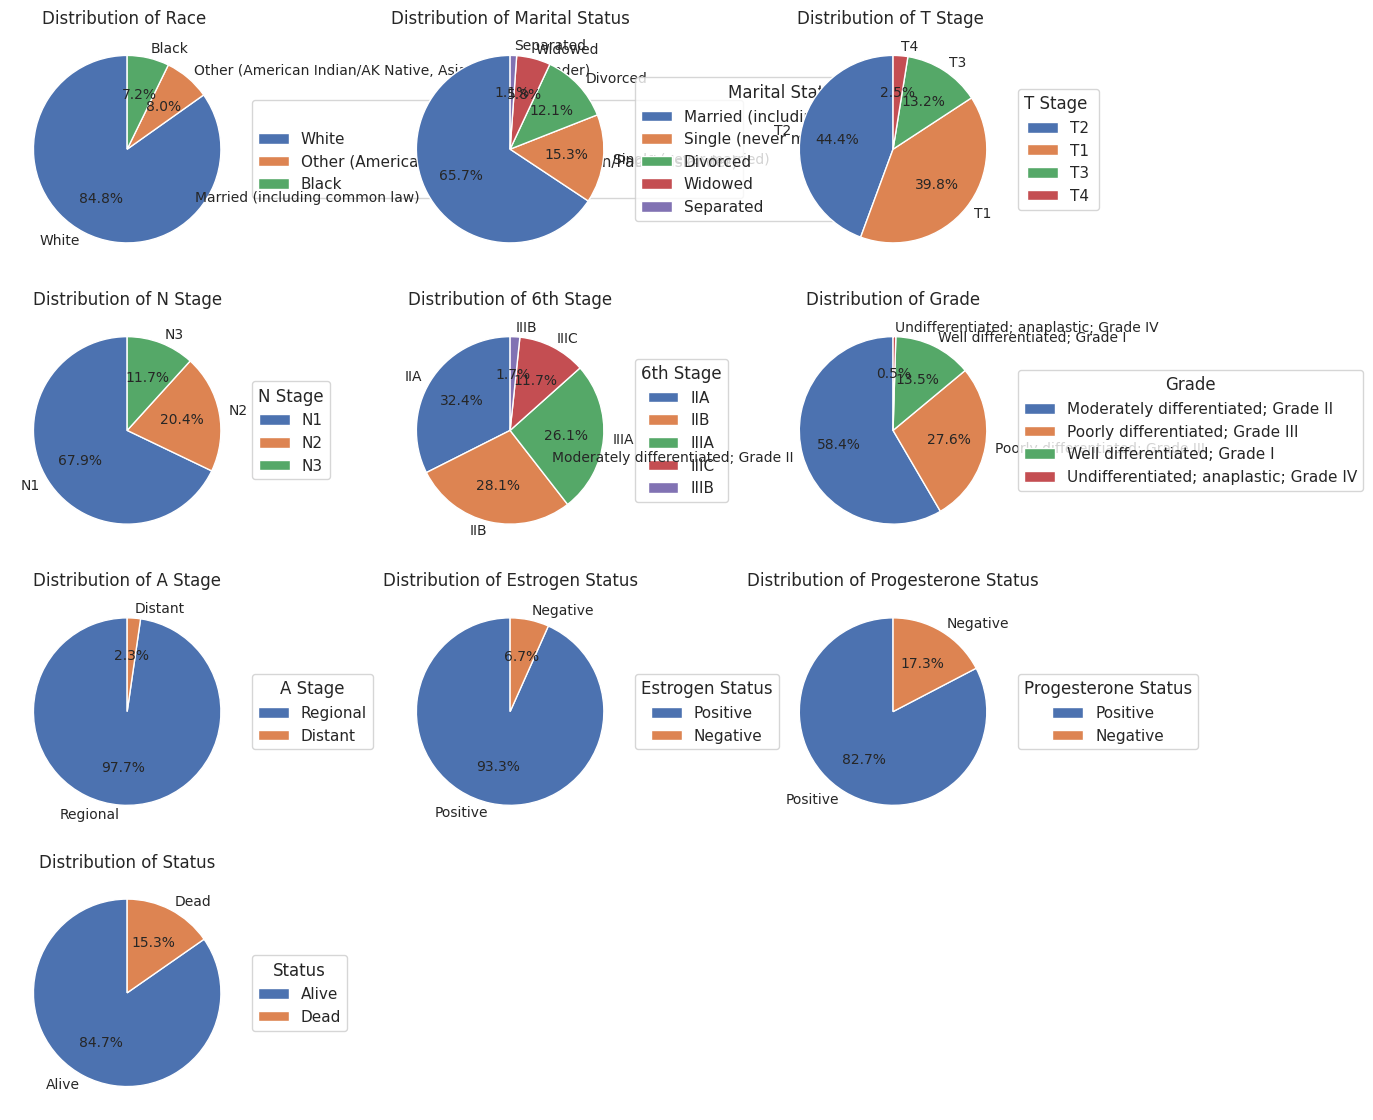

In [ ]:
# Visulize the object columns
# Get object columns
object_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of required rows and columns for subplots
num_rows = (len(object_columns) - 1) // 3 + 1
num_cols = min(len(object_columns), 3)

# Create subplots
fig, axes = plt.subplots(num_rows, ncols=num_cols, figsize=(14, 3.5 * num_rows))

# Iterate over object columns
for i, column in enumerate(object_columns):
    # Calculate value counts
    value_counts = df[column].value_counts()

    ax = axes[i // num_cols, i % num_cols]
    wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    ax.set_title(f'Distribution of {column}')

    # Add legend
    ax.legend(wedges, value_counts.index, title=column, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Remove empty subplots
for i in range(len(object_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 0.85, 1])
# Save figure
fig.savefig('object_columns_distribution.png', dpi=300)

plt.show()

### Observations:
1. The dataset comprises 16 attributes and 4024 records.
2. Among the attributes, 10 are of object data type, while the remaining 6 are numeric.
3. There is a column named "Unnamed: 3" that contains only NaN values, which will be addressed during the data cleaning process.
4. The summary statistics reveal that numeric features in the dataset have a wide range, spanning from 1 to several hundred. Consideration may be given to data scaling if dimension reduction or other numeric data processing models are employed in subsequent analyses.
5. From the preliminary visualization of the data, it is evident that the distribution of the numeric data varies significantly. Notably, there are numerous "outliers" observed in the "Tumor Size," "Regional Node Examined," and "Regional Node Positive" columns.

## 2. Data Cleaning

### 2.1 Handle missing value

In [ ]:
## Visualizing the locations of the missing data
# Import the library
import missingno as mno

# For better visulize the missing value, generate a missing value report table
# Missing values report
def missing_values_report(df):
    # Find out the total missing values
    mis_val = df.isnull().sum()

    # Calculate the percentage of missing values for each column
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Combine the missing values and percentages into a DataFrame
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns for clarity
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Get the number of columns and rows in the dataframe
    num_columns, num_rows = df.shape

    # Print a summary of missing values
    summary = (
        f"The dataframe has {num_columns} rows.\n"
        f"There are {mis_val_table['Missing Values'].astype(bool).sum()} columns that have missing values."
    )
    print(summary)

    # Return the dataframe with missing information
    return mis_val_table

missing_values= missing_values_report(df)
missing_values.style.background_gradient(cmap='GnBu')

The dataframe has 4024 rows.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Age,0,0.000000
Race,0,0.000000
Marital Status,0,0.000000
Unnamed: 3,4024,100.000000
T Stage,0,0.000000
N Stage,0,0.000000
6th Stage,0,0.000000
Grade,0,0.000000
A Stage,0,0.000000
Tumor Size,0,0.000000


From the missing values report table, it is observed that only one column has 100% missing values. An alternative approach is to eliminate this entire column from the data frame.

In [ ]:
# Remove the "Unnamed: 3" column
df_nm = df.drop("Unnamed: 3", axis=1)

# Rename column 'Race ' to 'Race' and column "T Stage " to "T Stage"
df_nm = df_nm.rename(columns={'Race ': 'Race'})
df_nm = df_nm.rename(columns={'T Stage ': 'T Stage'})

# Check the data frame

display(df_nm.head())
display(df_nm.columns)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

### 2.2 Address duplicate records

In [ ]:
# Given that records in each column can be identical, we consider rows with identical values across all columns as duplicate records in this dataset.
# Therefore, we will identify and examine rows where all values in all columns are the same for potential duplicates.

# Check for duplicate rows where all values in all columns are the same
all_duplicates = df_nm.duplicated(keep=False)

# Display rows that are duplicates
all_duplicates_df = df_nm[all_duplicates]
print("Duplicate rows where all values in all columns are the same")
display(all_duplicates_df)

Duplicate rows where all values in all columns are the same


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1009,63,White,Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,17,Positive,Positive,9,1,56,Alive
1010,63,White,Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,17,Positive,Positive,9,1,56,Alive


In [ ]:
# Remove duplicate rows and retain only the first occurrence
df_nd = df_nm.drop_duplicates().copy()

### 2.3 Address the typos and outliers

After examining the pie charts for the object columns, no unusual categories or typos were observed. The next step involves checking for outliers in the dataset.

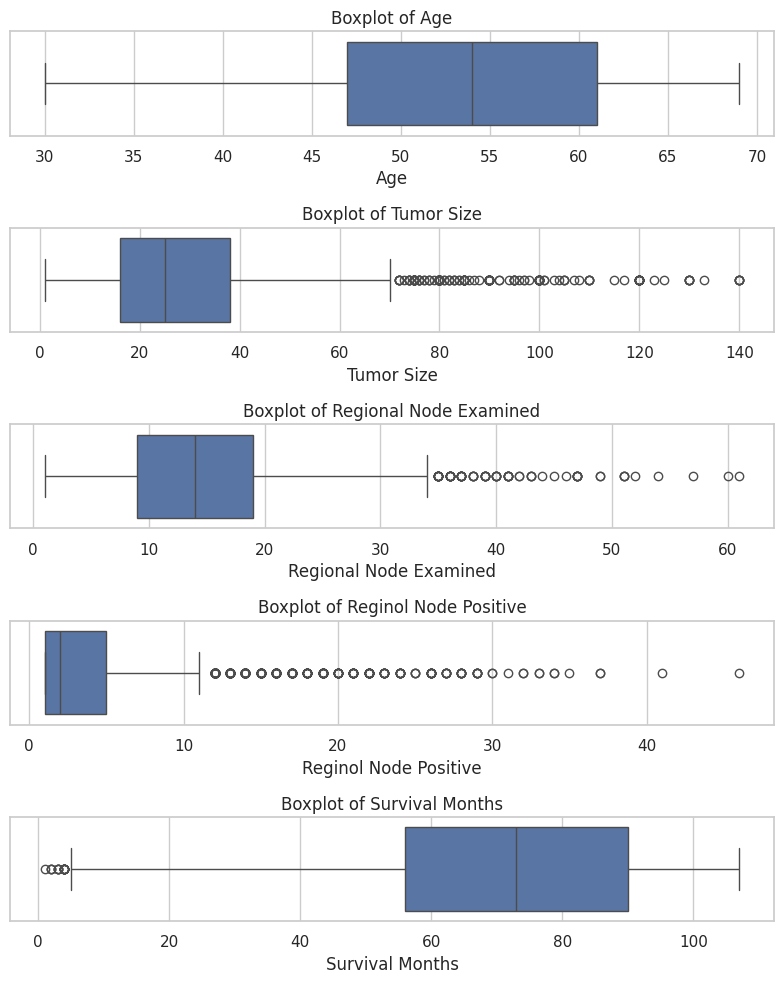

In [ ]:
# Use box plot again to check the outliers
# Find the 'numeric_columns_nd'
numeric_columns_nd = df_nd.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for boxplots
fig, axes = plt.subplots(len(numeric_columns_nd), 1, figsize=(8, 2*len(numeric_columns_nd)))

# Iterate over numeric columns and create boxplots
for i, column in enumerate(numeric_columns_nd):
    sns.boxplot(x=df_nd[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
fig.savefig("boxplot for the clean dataset.png",dpi =300)
plt.show()

There are values exceeding the majority of the data; however, considering these are patient records, we expect variation in the values. Therefore, we will retain these values for future analysis.

## 3. Data Transformation

### 3.1 Feature engineering

In [ ]:
# Positive Lymph Node Ratio
df_nd['Positive_Node_Ratio'] = df_nd['Reginol Node Positive'] / df_nd['Regional Node Examined']
df_nd['Positive_Node_Ratio']

0       0.58
1       0.36
2       0.25
3       0.04
4       0.24
        ... 
4019    0.05
4020    0.38
4021    0.50
4022    0.14
4023    1.00
Name: Positive_Node_Ratio, Length: 4023, dtype: float64

### 3.2 Data normalization or scaling

We've employed Min-Max scaling to bring our numerical features into a standard [0, 1] range. This method retains the original distribution of the data while remaining robust against the potential distortion from outliers. Although Z-score normalization is often the method of choice for data with a Gaussian distribution, especially when addressing outliers, our dataset displays a non-Gaussian distribution with minimal outlier concerns, making Min-Max scaling an appropriate choice.

In [ ]:
# List of numerical columns
numerical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Fit the scaler on the numerical columns of the DataFrame
#scaler = MinMaxScaler()
#df_nd[numerical_columns] = scaler.fit_transform(df_nd[numerical_columns])

# Check few rows to verify the scaling
# print(df_nd.head())
#df_nd[numerical_columns]

### 3.3 Encoding categorical data

One-hot encoding is more suitable for nominal categorical data, while label encoding is more suitable for ordinal categorical data.

In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply One-hot encoding to categorical columns with nominal features
df_encoded = pd.get_dummies(df_nd, columns=['Race', 'Marital Status', 'A Stage'])

# Apply label encoding to categorical columns with ordinal features
ordinal_columns = ['T Stage', 'N Stage', '6th Stage']
for col in ordinal_columns:
    df_encoded[col + '_encoded'] = label_encoder.fit_transform(df_nd[col])

In [ ]:
# Define the order of "Grade"
grade_order = [
    'Well differentiated; Grade I',
    'Moderately differentiated; Grade II',
    'Poorly differentiated; Grade III',
    'Undifferentiated; anaplastic; Grade IV'
]

# Convert "Grade" column to categorical data with a specified order
df_encoded['Grade_encoded'] = pd.Categorical(df_nd['Grade'], categories=grade_order, ordered=True).codes

In [ ]:
# Apply label encoding to binary features
binary_columns = ['Estrogen Status', 'Progesterone Status', 'Status']
for col in binary_columns:
    df_encoded[col + '_encoded'] = label_encoder.fit_transform(df_nd[col])

In [ ]:
# Showing results of categorical data encoding
# Adjust Pandas display settings to improve DataFrame visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 2)

# print(df_nd.head())
display(df_encoded.head(10))
display(df_encoded.info())

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Positive_Node_Ratio,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,T Stage_encoded,N Stage_encoded,6th Stage_encoded,Grade_encoded,Estrogen Status_encoded,Progesterone Status_encoded,Status_encoded
0,43,T2,N3,IIIC,Moderately differentiated; Grade II,40,Positive,Positive,19,11,1,Alive,0.58,0,1,0,0,1,0,0,0,0,1,1,2,4,1,1,1,0
1,47,T2,N2,IIIA,Moderately differentiated; Grade II,45,Positive,Positive,25,9,2,Alive,0.36,0,1,0,0,1,0,0,0,0,1,1,1,2,1,1,1,0
2,67,T2,N1,IIB,Poorly differentiated; Grade III,25,Positive,Positive,4,1,2,Dead,0.25,0,0,1,0,1,0,0,0,0,1,1,0,1,2,1,1,1
3,46,T1,N1,IIA,Moderately differentiated; Grade II,19,Positive,Positive,26,1,2,Dead,0.04,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,1
4,63,T2,N2,IIIA,Moderately differentiated; Grade II,35,Positive,Positive,21,5,3,Dead,0.24,0,0,1,0,1,0,0,0,0,1,1,1,2,1,1,1,1
5,49,T2,N3,IIIC,Moderately differentiated; Grade II,32,Positive,Positive,20,11,3,Alive,0.55,0,0,1,0,1,0,0,0,0,1,1,2,4,1,1,1,0
6,64,T2,N1,IIB,Moderately differentiated; Grade II,22,Positive,Positive,1,1,3,Dead,1.00,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1
7,55,T1,N1,IIA,Moderately differentiated; Grade II,15,Positive,Positive,9,1,3,Alive,0.11,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0
8,59,T3,N1,IIIA,Moderately differentiated; Grade II,70,Positive,Positive,9,1,4,Dead,0.11,0,0,1,0,0,0,1,0,0,1,2,0,2,1,1,1,1
9,67,T3,N2,IIIA,Poorly differentiated; Grade III,55,Positive,Positive,9,9,4,Dead,1.00,0,0,1,0,1,0,0,0,0,1,2,1,2,2,1,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023 entries, 0 to 4023
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age                                                             4023 non-null   int64  
 1   T Stage                                                         4023 non-null   object 
 2   N Stage                                                         4023 non-null   object 
 3   6th Stage                                                       4023 non-null   object 
 4   Grade                                                           4023 non-null   object 
 5   Tumor Size                                                      4023 non-null   int64  
 6   Estrogen Status                                                 4023 non-null   object 
 7   Progesterone Status                                

None

### 3.4 Date and time feature extraction

The dataset primarily focuses on cancer-related features and patient demographics. The analysis will center around investigating relationships between these variables, conducting survival analysis, and potentially developing predictive models for patient outcomes. Given the nature of the dataset, there are no variables directly related to date and time information. Therefore, performing meaningful date and time feature extraction is not applicable.

## 4. Exploratory data analysis through visualizations

## Aim 1: Profile breast cancer prevalence and distribution by demographics, including age, race, and marital status.


### Age

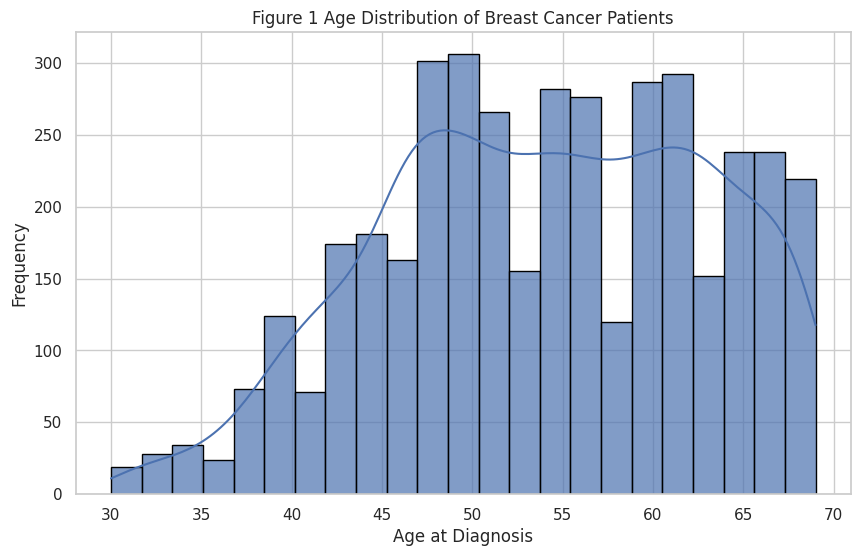

In [ ]:
# Histogram for the distribution of age at diagnosis
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Age'], alpha=0.7, edgecolor='black', kde=True)
plt.title('Figure 1 Age Distribution of Breast Cancer Patients')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.show()

*   The largest number of breast cancer diagnoses appears to occur in patients between the ages of 48 and 68. This suggests a higher prevalence of breast cancer in middle-aged individuals.
*   There are fewer cases of breast cancer diagnosed in the younger age group, particularly those under 40 years old. This could indicate that breast cancer is less common among younger individuals.
*   The spike in frequency around the age of 50 may be associated with increased screening efforts, as many guidelines suggest that regular breast cancer screenings should start at this age.

### Race

<ipython-input-104-eda3a318a73f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




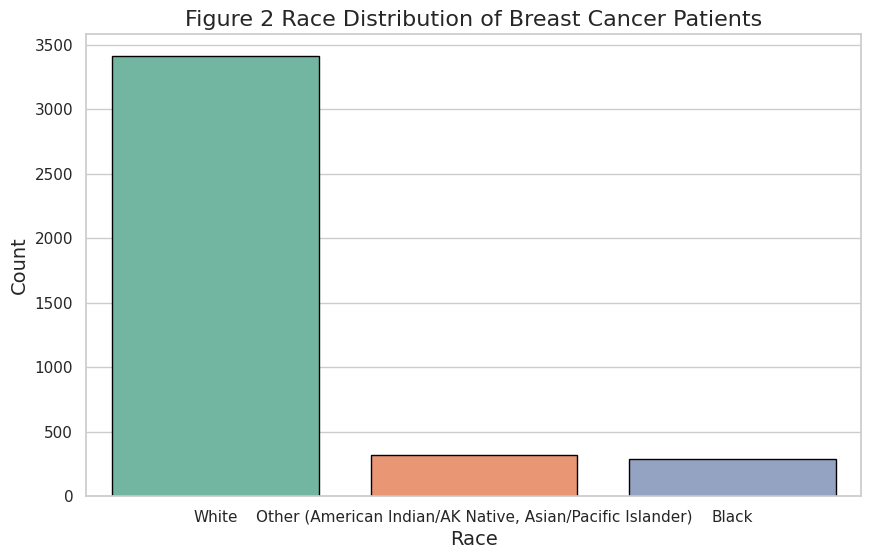

In [ ]:
# Bar chart for the distribution of race among patients
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', data=df_nd, order=df_nd['Race'].value_counts().index,
              palette='Set2', edgecolor='black')
plt.title('Figure 2 Race Distribution of Breast Cancer Patients', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

*   The number of breast cancer cases in the White racial group is significantly higher compared to the other groups. This could suggest a higher prevalence or a higher detection rate in this population.
*   Or the data may not represent the actual prevalence of breast cancer across races but rather reflect the population of the sample collected.

### Marital status

<ipython-input-105-20f9b4a6688a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




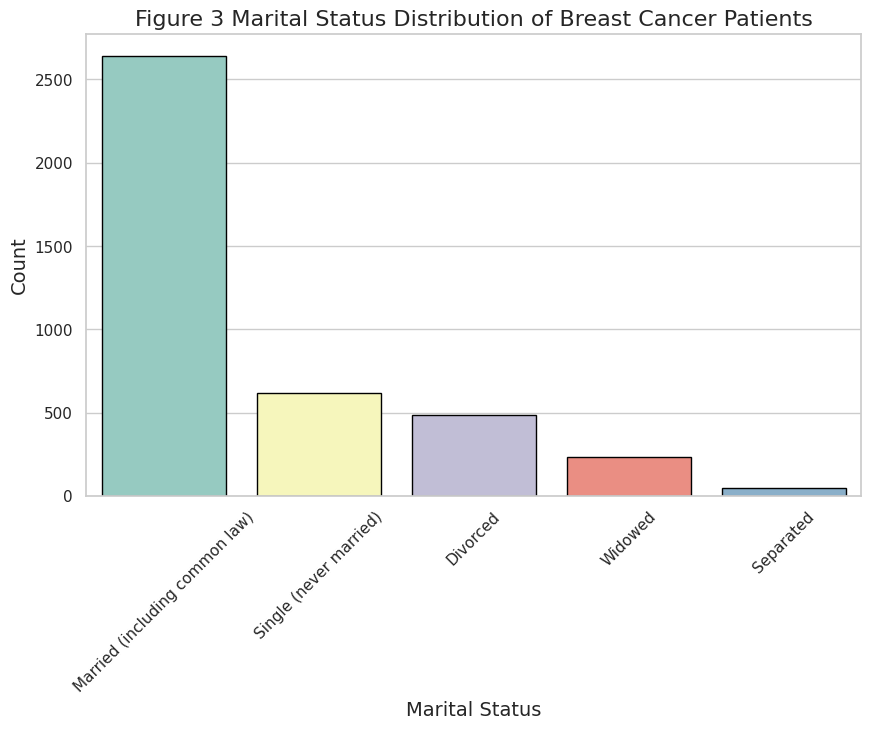

In [ ]:
# Bar chart for the distribution of marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', data=df_nd, order=df['Marital Status'].value_counts().index,
              palette='Set3', edgecolor='black')
plt.title('Figure 3 Marital Status Distribution of Breast Cancer Patients', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45)
plt.show()

*   The majority of breast cancer patients in the dataset are married. This could suggest a higher likelihood of diagnosis or reporting among married individuals, or it may simply reflect the demographics of the population.
*   The next most significant group after married patients is the single/never-married group. This may indicate that unmarried individuals also have a considerable representation among breast cancer patients.

### Race vs. Age

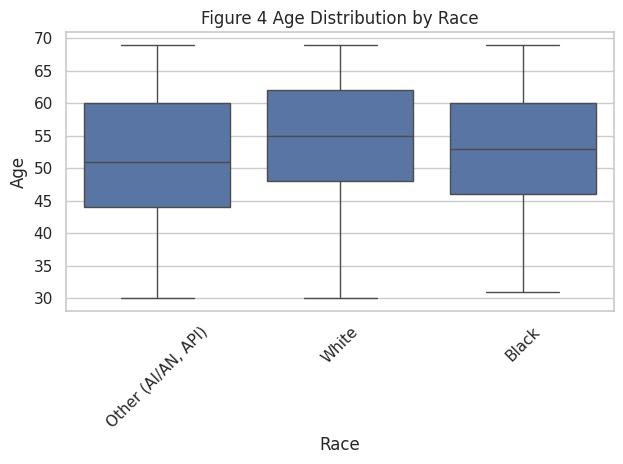

In [ ]:
# Create a boxplot
boxplot = sns.boxplot(x='Race', y='Age', data=df_nd)
plt.title('Figure 4 Age Distribution by Race')

# Get the current xticks
xticks_labels = boxplot.get_xticklabels()

# Modify a specific label
new_labels = [label.get_text().replace('Other (American Indian/AK Native, Asian/Pacific Islander)', 'Other (AI/AN, API)')
              if 'Other' in label.get_text() else label.get_text() for label in xticks_labels]

plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)

plt.tight_layout()
plt.show()

*   The median age of diagnosis seems relatively similar across the three racial groups, around the mid-50s.
*   The age range is pretty similar across the groups too, with most patients falling between roughly 45 and 65 years old.
*   The age when most people are diagnosed with breast cancer doesn’t seem to vary much between different racial groups.

### Marital Status vs. Age

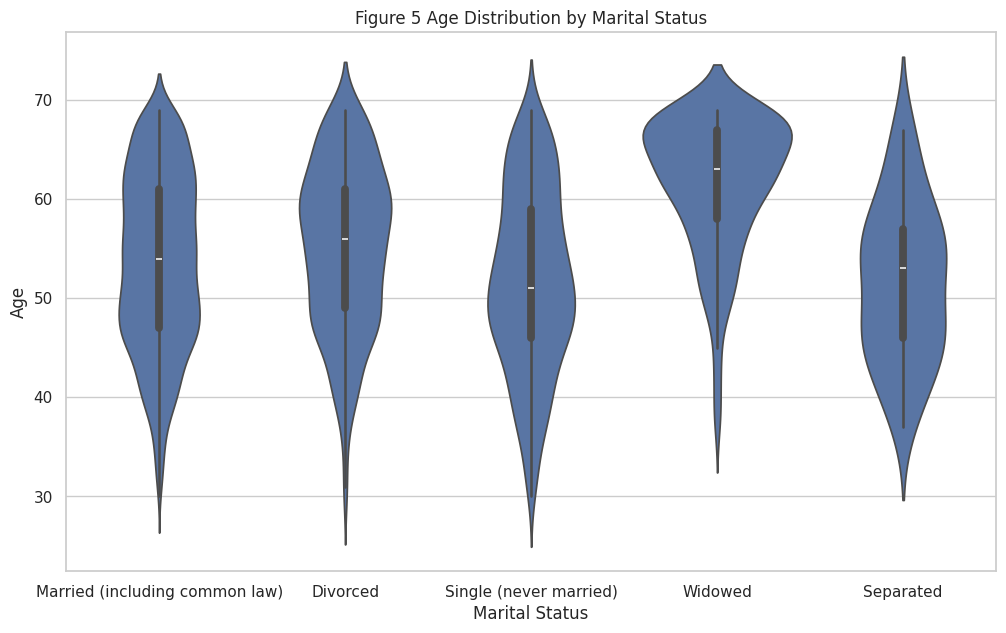

In [ ]:
# Create a violin plot
plt.figure(figsize=(12, 7))
sns.violinplot(x='Marital Status', y='Age', data=df_nd)
plt.title('Figure 5 Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

*   The median age seems fairly consistent across different marital statuses. This suggests that the median age at which individuals are diagnosed with breast cancer does not vary drastically between different marital groups.
*   All categories show a wide distribution, suggesting patients of a broad age range within each marital status.
*   Some violins have longer tails on the lower end, for example, the 'Widowed' category shows a longer lower tail, suggesting a significant number of older patients.


### Age Distribution by Race and Marital Status

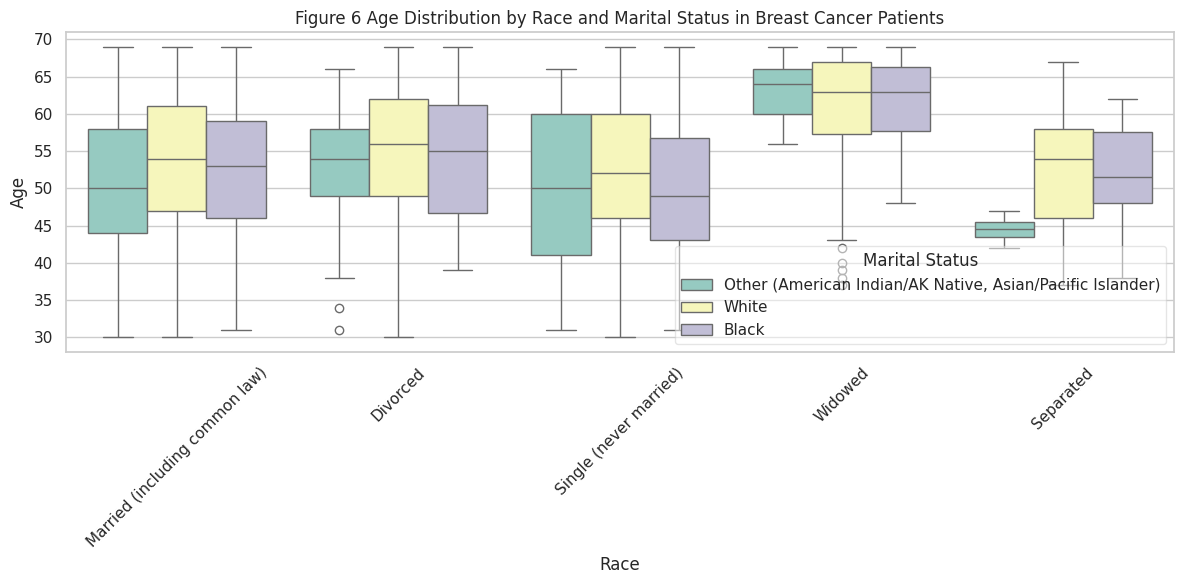

In [ ]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marital Status', y='Age', hue='Race', data=df_nd, palette="Set3")
plt.title('Figure 6 Age Distribution by Race and Marital Status in Breast Cancer Patients')
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Marital Status', loc='lower right', framealpha=0.5)
plt.tight_layout()

plt.show()

The distribution patterns do not significantly change across races within the same marital status. This might suggest that marital status has a similar effect on age at diagnosis across different racial groups.

## Aim 2: Assess the Impact of Hormonal Receptor Status on Breast Cancer Outcomes.

### Estrogen Status

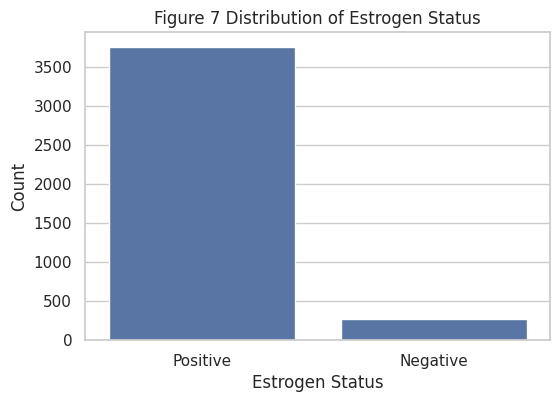

In [ ]:
# Distribution of Estrogen Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Estrogen Status', data=df_nd)
plt.title('Figure 7 Distribution of Estrogen Status')
plt.xlabel('Estrogen Status')
plt.ylabel('Count')
plt.show()

*   Estrogen-receptor positive cases are substantially more common than negative cases.
*   The dominance of estrogen-receptor positive cases may indicate a strong hormonal influence in the development of breast cancer. This could have implications for both treatment and preventative strategies.


### Progesterone Status

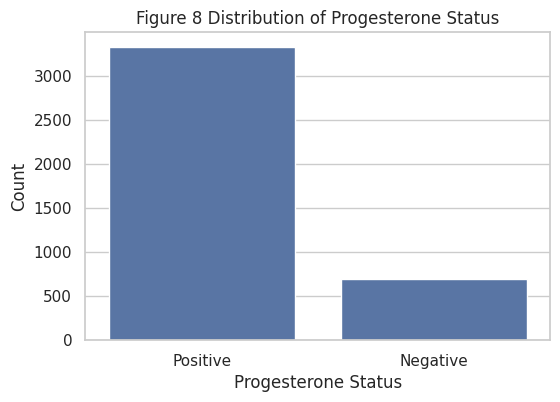

In [ ]:
# Distribution of Progesterone Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Progesterone Status', data=df_nd)
plt.title('Figure 8 Distribution of Progesterone Status')
plt.xlabel('Progesterone Status')
plt.ylabel('Count')
plt.show()

*   Progesterone-receptor positive cases are substantially more common than negative cases.
*   The dominance of progesterone-receptor positivee cases may indicate a strong hormonal influence in the development of breast cancer. This could have implications for both treatment and preventative strategies.


### Survival Months

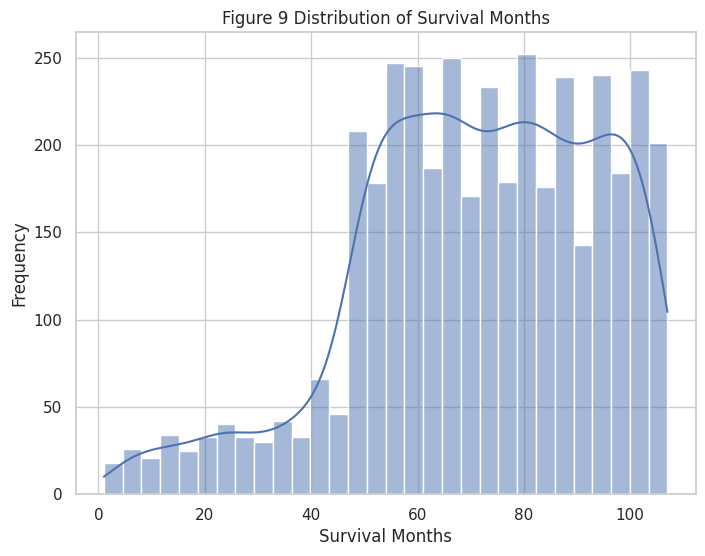

In [ ]:
# Histogram for Survival Months distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_nd['Survival Months'], kde=True, bins=30)
plt.title('Figure 9 Distribution of Survival Months')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.show()

*   The survival months span from less than 10 months to over 100 months, indicating variability in patient outcomes.
*   The frequency of patients who survive beyond 50 months remains substantial, indicating a significant number of long-term survivors.
*   The frequency of survival seems to plateau after 50 months, which could imply that patients who survive past a certain threshold continue to do so for an extended time.

### Survival Status by Estrogen Status

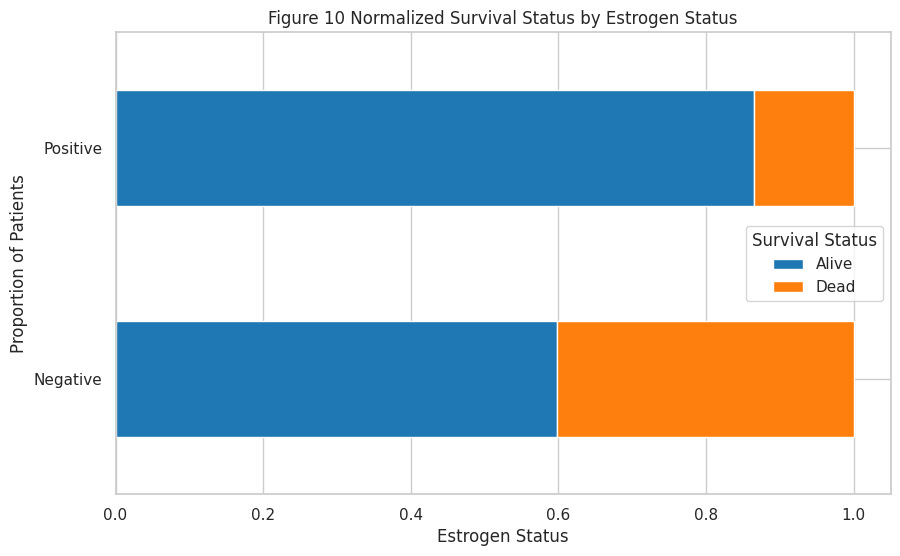

In [ ]:
# Prepare the data for Estrogen Status
status_counts = df_nd.groupby(['Estrogen Status', 'Status']).size().unstack()
status_proportions = status_counts.div(status_counts.sum(axis=1), axis=0)
status_proportions.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Plot normalized stacked bar chart
plt.title('Figure 10 Normalized Survival Status by Estrogen Status')
plt.xlabel('Estrogen Status')
plt.ylabel('Proportion of Patients')
plt.legend(title='Survival Status')
plt.show()



*  For both estrogen-positive and estrogen-negative groups, the proportion of patients who are alive is greater than those who are deceased.
*  The proportion of patients who are alive appears slightly higher in the estrogen-positive group compared to the estrogen-negative group. This suggests that among the patients in this dataset, those with estrogen-positive status may have a marginally higher proportion of survival.
*  The slight difference in proportions could imply that estrogen status has an influence on survival outcomes, potentially related to the biology of the cancer and its responsiveness to hormone therapy.



### Survival Status by Progesterone Status

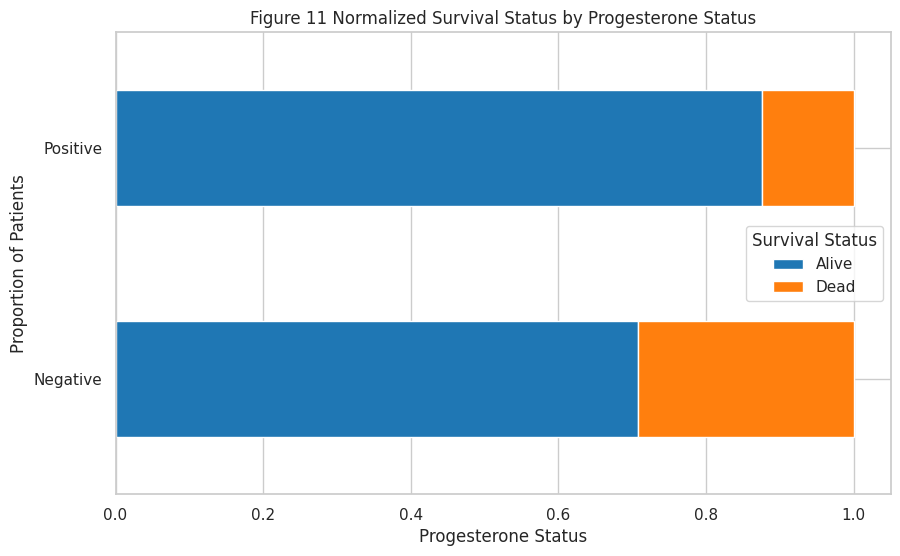

In [ ]:
# Prepare the data for Progesterone Status
status_counts = df.groupby(['Progesterone Status', 'Status']).size().unstack()
status_proportions = status_counts.div(status_counts.sum(axis=1), axis=0)
status_proportions.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Create a normalized stacked bar chart
plt.title('Figure 11 Normalized Survival Status by Progesterone Status')
plt.xlabel('Progesterone Status')
plt.ylabel('Proportion of Patients')
plt.legend(title='Survival Status')
plt.show()



*   The chart indicates a high survival rate within the dataset for both categories.
*   Similar to the Estrogen Status chart, the progesterone-positive group shows a slightly larger proportion of the bar filled with the color representing living patients. This suggests that there may be a marginally higher survival rate in the progesterone-positive group.
*   The slight difference in proportions could imply that progesterone status has an influence on survival outcomes, potentially related to the biology of the cancer and its responsiveness to hormone therapy.



### Survival Months by Estrogen Status

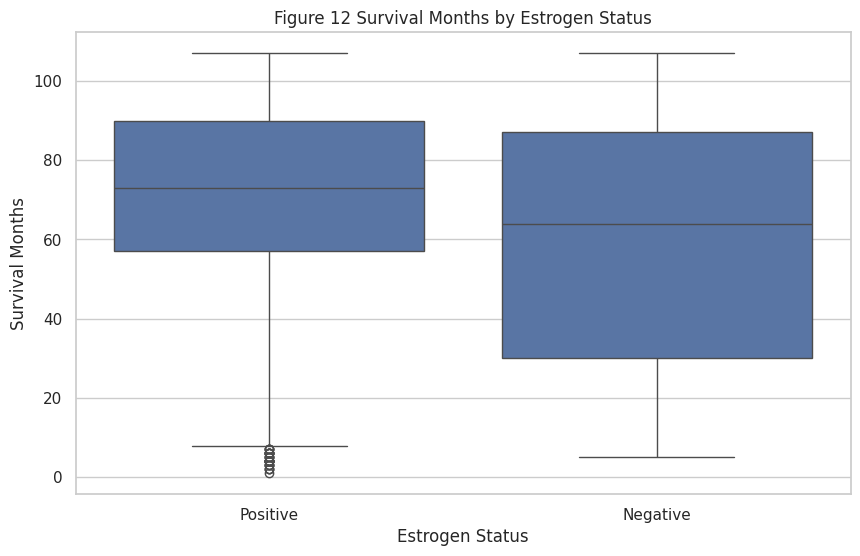

In [ ]:
# Box plot for Survival Months by Estrogen Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estrogen Status', y='Survival Months', data=df_nd)
plt.title('Figure 12 Survival Months by Estrogen Status')
plt.xlabel('Estrogen Status')
plt.ylabel('Survival Months')
plt.show()

*   The median survival months appear to be similar for both estrogen-positive and estrogen-negative patients. This suggests that estrogen status might not have a significant impact on the median survival time.
*   The height of the box, representing the middle 50% of the data, is obviously wider for the estrogen-positive group. This implies a broader spread of survival times within this group compared to the estrogen-negative group.
*   The presence of outliers in the estrogen-positive group, particularly at the lower end of survival months, indicates that there are some estrogen-positive patients who have a shorter survival time than the general trend.

### Survival Months by Progesterone Status

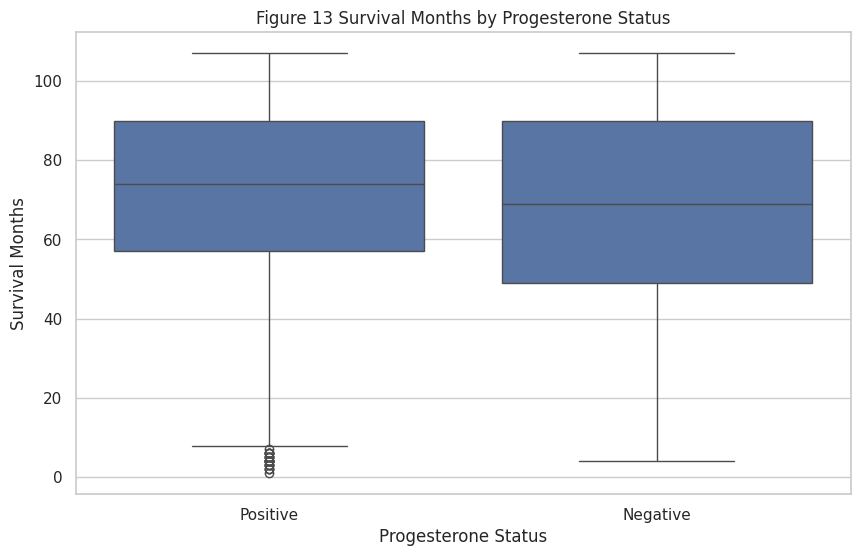

In [ ]:
# Box plot for Survival Months by Progesterone Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Progesterone Status', y='Survival Months', data=df_nd)
plt.title('Figure 13 Survival Months by Progesterone Status')
plt.xlabel('Progesterone Status')
plt.ylabel('Survival Months')
plt.show()


*   Both groups show a similar median survival time, which indicates that the central tendency of survival is consistent across progesterone statuses.
*   The progesterone-positive group presents outliers on the lower end, signifying that there are a few cases with survival times much shorter than the main group of patients.
*   The absence of outliers in the progesterone-negative group and the wider IQR could imply that survival times among these patients vary more substantially from the median than in the progesterone-positive group, despite having a similar range.



## Aim 3 Relate tumor stage, grade, and size to survival, offering insights into disease progression.

### (1) correlation between stage, grade, tumor size and survival and visualize the matrix

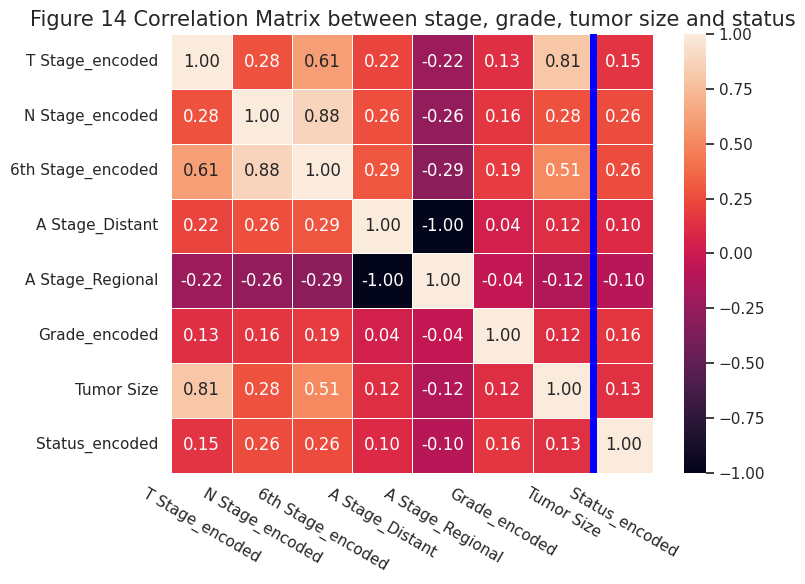

In [ ]:
# Select the satge, grade, tumor size and status features (encoded)
selected_features = ['T Stage_encoded','N Stage_encoded','6th Stage_encoded','A Stage_Distant','A Stage_Regional','Grade_encoded','Tumor Size','Status_encoded']

# Calculate the correlation matrix
cm_status = df_encoded[selected_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_status, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Figure 14 Correlation Matrix between stage, grade, tumor size and status',size=15)
plt.xticks(rotation=-30)

# Highlight the the 'Status' column for better visualization
# Get the index of the 'Status' column
status_col_index = cm_status.columns.get_loc('Status_encoded')

# Highlight the 'Status' column by setting its background color to a different shade
plt.axvline(x=status_col_index, color='blue', linewidth=5)

# Show and save the plot
plt.tight_layout()
plt.savefig('Figure 1 Correlation Matrix.png', dpi=300)
plt.show()

Based on the correlation matrix, there doesn't seem to be a significant correlation between the selected features and patient status (alive or deceased), as all absolute correlation coefficients are below 0.8. This lack of notable correlation may be due to the relatively small sample size used for calculation.

Interestingly, the 6th stage is positively correlated with the N stage, indicating a similar standard of division between these two stages. Additionally, tumor size is positively correlated with the T stage, suggesting a similarity in their divisions. This correlation might be explained by the fact that the T stage uses tumor size for its classification, as referenced in NIH documentation (https://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th/).

Although the correlation coefficients are positive (except for 'A Stage_Regional', which represents the encoded A stage, a binary feature with 'A Stage_Distant'), suggesting some degree of positive correlation between these features and status, further investigation is needed to explore the relationship between these features and the patient's status more comprehensively.

### (2) The relation between Grade, Stage and Survival using count plot and histogram
We will examine the distribution of patient numbers across different grades and statuses using a Count plot. Additionally, we'll plot the distribution of patient numbers across different stages (T stage, N stage, and 6th Stage) and statuses.

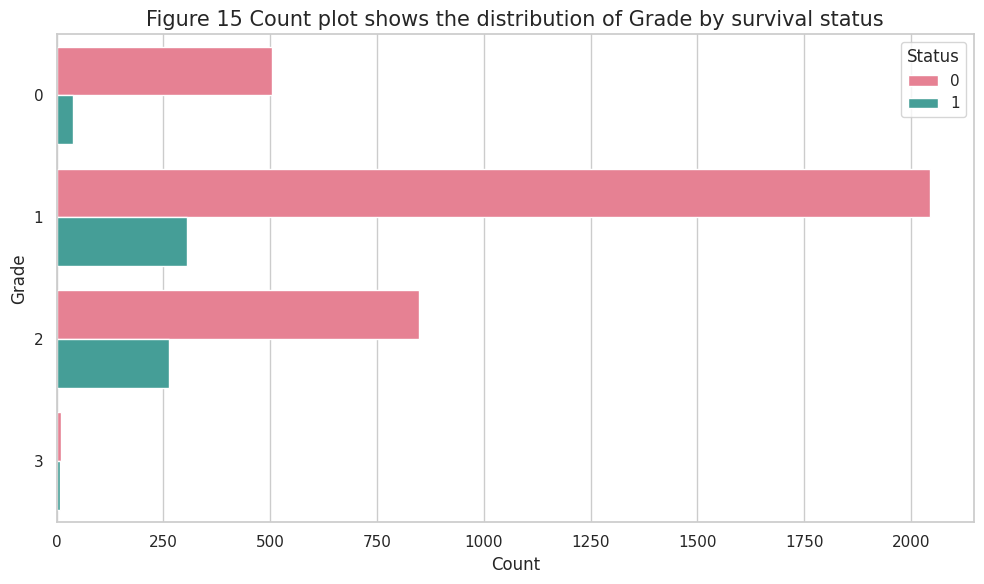

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))

# Plot the primary y-axis;
ax1 = sns.countplot(y='Grade_encoded', hue='Status_encoded', data=df_encoded, palette='husl')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Grade')
plt.title('Figure 15 Count plot shows the distribution of Grade by survival status', size = 15)
plt.legend(title='Status', loc='upper right')

# Show and save the plot
plt.tight_layout()
plt.savefig('Figure 2 Count plot.png', dpi=300)
plt.show()

 In the 'Grade_encoded' column, '0' represents 'well-differentiated, Grade I'; '1' represents 'moderately differentiated, Grade II'; '2' represents 'poorly differentiated, Grade III'; '3' represents 'undifferentiated, Grade IV'. In the 'Status_encoded' column, '0' represents 'Alive' while '1' represents 'Dead'.

A higher grade indicates a lower level of differentiation, and less differentiated cancer or immune cells suggest a higher invasion and severity of the cancer. From Figure 15, we observe that there are more patients in Grade II, with a higher proportion of alive patients, but also a notable number of dead patients. Comparing the percentages of alive and dead patients in each grade level, Grade III has a higher proportion of dead patients, while Grade I has a lower proportion of dead patients. Grade IV has the smallest number of patients, indicating that it is rare for patients to be classified with undifferentiated cancer or immune cells.

In [ ]:
!pip install -U kaleido

In [ ]:
#!pip install -U kaleido #Install the necessary dependency
import plotly.express as px
import plotly.io as pio

# Define a list of proteins or stages
stages = ['T Stage', 'N Stage', '6th Stage']

# Create a function to generate the histogram plot for each stage
def plot_histogram(stage):
    fig = px.histogram(df_encoded, x=stage + '_encoded', color='Status_encoded', title=' Figure 16 Distribution of Survival Status by disease stage - ' + stage,color_discrete_map={'virginica': 'blue', 'setosa': 'red'})
    fig.update_layout(barmode='group', xaxis_title='Stage', yaxis_title='Count', font=dict(size=14), width=800, height=600)
    # Save the figure to an image file
    #pio.write_image(fig, f'{stage}_histogram.png')
    # Show the figure
    fig.show()

# Loop through each stage and generate the histogram plot
for stage in stages:
    plot_histogram(stage)


In T, N, and 6th stages, higher stages indicate the severity of disease development. From Figure 16, we observe a higher total number of patients and a greater ratio of alive patients in the lower stages.

**In the T stage**, stages 0 and 1 exhibit the highest patient numbers, with stage 1 having the largest number of deceased patients. In stage 3, an equal proportion of patients are alive and deceased, suggesting a similar likelihood of survival or death at this stage.

**For the N stage**, stage 0 has the highest total number of patients, but the number of deceased patients across different N stages is similar. However, stage 0 has a higher percentage of alive patients, indicating that the mortality rate may not be strongly associated with the N stage level.

**Regarding the 6th stages**, the number of alive patients decreases and the number of deceased patients increases as the stage progresses through the first three stages. In stage 3 of the 6th stage, there is a decrease in both alive and deceased patients, while stage 4 exhibits the highest percentage of deceased patients compared to the percentage of alive patients at this stage. This suggests that the 6th stage can effectively identify the severity of the disease.

### (3) Relationship between tumor size, grade and survival status

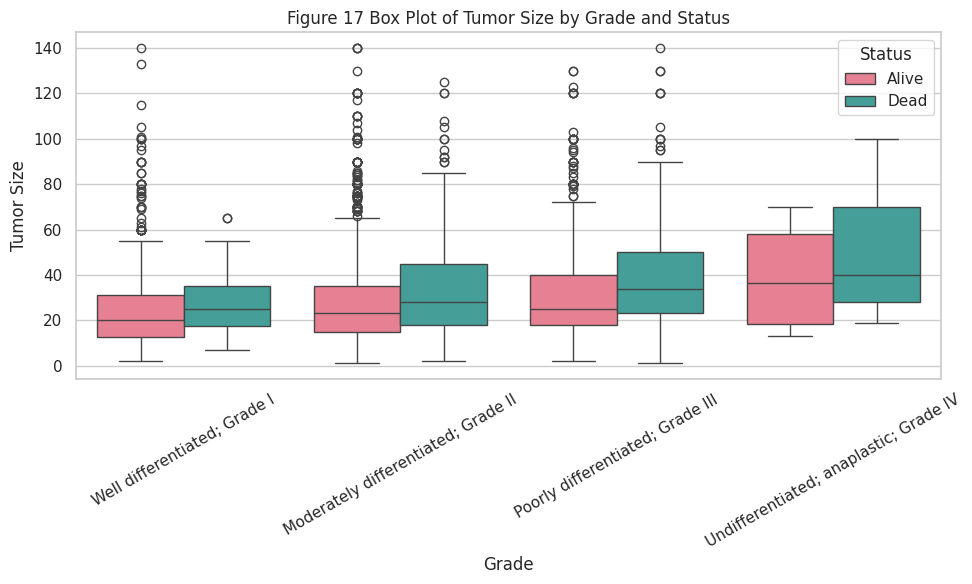

In [ ]:
# Create a box plot to show the distribution of tumor size by grade and
# Define the order of the x-axis category values
grade_order = ['Well differentiated; Grade I', 'Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Undifferentiated; anaplastic; Grade IV']


plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Tumor Size', hue='Status', data=df_encoded, palette='husl', order=grade_order)
plt.xlabel('Grade')
plt.ylabel('Tumor Size')
plt.title('Figure 17 Box Plot of Tumor Size by Grade and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=30)

#Show and save the figure
plt.tight_layout()
plt.savefig('Figure 4 Box Plot of Tumor Size by Grade and Status.png', dpi=300)
plt.show()

From Figure 17, it is evident that Grade IV, representing the most severe disease stage, exhibits the largest median tumor size among both alive and dead patients, with the median tumor size being notably larger in deceased patients. Grade I patients demonstrate the smallest median tumor siz

Across all other grades, there are numerous outliers in tumor size for both alive and dead patients, particularly with a wide distribution observed among alive patients.

However, when considering all grades collectively, the median tumor size tends to be higher in deceased patients compared to those who are alive at each stage. While tumor size shows some positive correlation with grade level and patient survival stage, this correlation appears to be weak overall.

### (4) Relationship between grade, T stage, N stage, 6th stage, survival status and tumor size.

We employed a sunburst plot to illustrate the hierarchical relationship from status to Grade to T Stage to N Stage to 6th Stage, where the size of the segments indicates the sum of Tumor Size. In addition to the sunburst plot, we calculated the mean tumor size for each group. To visualize which group has the larger tumor size, we utilized a treemap. Since the segments in the sunburst plot represent the sum of tumor sizes, the treemap allows us to observe the mean tumor size for each group.

In [ ]:
# Create the sunburst plot
fig = px.sunburst(df_encoded, path=['Status','Grade', 'T Stage', 'N Stage', '6th Stage'], values='Tumor Size')

# Update layout
fig.update_layout(title='Figure 18 Sunburst Plot of Tumor Size by Status, Grade, T Stage, N Stage, and 6th Stage', height=800, width=1000)

# Show the plot
fig.show()

In [ ]:
# Group the DataFrame by the categorical variables and calculate the mean tumor size for each group
mean_tumor_size = df_encoded.groupby(['Status','Grade', 'T Stage', 'N Stage', '6th Stage'])['Tumor Size'].mean()

# Reset the index to convert the grouped result into a DataFrame
mean_tumor_size = mean_tumor_size.reset_index()

# Create the TreeMap using the mean tumor size as the numerical data
fig = px.treemap(mean_tumor_size, path=['Status','Grade', 'T Stage', 'N Stage', '6th Stage'], values='Tumor Size',
                 title='Figure 19 TreeMap shows the mean tumor size by Status, Grade, T Stage, N Stage, and 6th Stage')

fig.show()

From the Sunburst plot, we observe that the combination of Grade II, Stage IIB, Stage N1, and Stage T2 exhibits the largest proportion of tumor size among alive patients, indicating a substantial cumulative tumor size in this group. Conversely, among deceased patients, the distribution of tumor size proportions is more evenly distributed, with Stage IIB/IIIC, Stage N1, and Stage T2 representing a relatively larger group in terms of tumor size. However, the variation in the number of patients across different grades underscores that the sum of tumor sizes alone does not provide deeper insights into the relationship between tumor size, disease progression, and patient status.

In Figure 19, the mean tumor size is notably higher in the IIIA/IIIC, N2/N3, T3, and Grade I group among alive patients. While in the dead patients, the highest mean tumor size is observed in the IIIA/IIIC, N2/N3, T3, and Grade III group. Among alive patients, larger tumors tend to occur in the early grade levels but with severe disease stages, particularly in Grade I. Conversely, among deceased patients, tumor size demonstrates a positive correlation with disease severity stages. Overall, tumor size can potentially serve as a predictor of disease stage in early-grade levels among alive patients and disease severity among deceased patients. However, it may not reliably predict patient mortality, as the mean tumor size does not exhibit notable differences between alive and deceased groups.

## Aim 4 Evaluate regional lymph node examination data for prognostic relevance.

Correlation matrix will be used to view the correlation coefficient between regional lymph node features and the survival status.

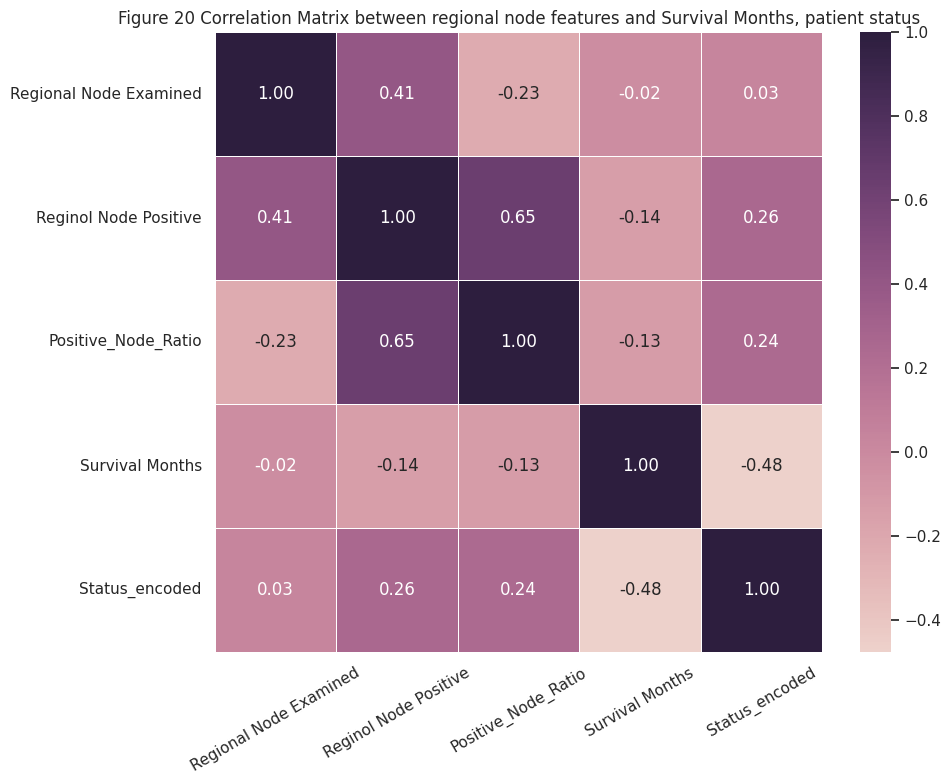

In [ ]:
# Select the relevant columns for correlation analysis
col_lymph = ['Regional Node Examined', 'Reginol Node Positive', 'Positive_Node_Ratio', 'Survival Months','Status_encoded']
correlation_lymph = df_encoded[col_lymph]

# Compute the correlation matrix
correlation_matrix = correlation_lymph.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5,cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Figure 20 Correlation Matrix between regional node features and Survival Months, patient status')
plt.xticks(rotation = 30)

plt.tight_layout()
plt.savefig('Figure 7 Correlation Matrix between regional node features and Survival.png', dpi=300)
plt.show()


From the correlation matrix, Survival Months exhibit a negative correlation with patient status, with a correlation coefficient of -0.48. This suggests that patients with longer survival periods tend to have a lower status level, where 0 represents being alive.

On the other hand, the number of Regional Nodes Examined shows no significant correlation with survival months or survival status. However, both the number of positive regional nodes and the positive node ratio are positively correlated with survival status and negatively correlated with survival months, albeit with relatively small correlation coefficients. This implies that a higher number of metastatic lymph nodes may indicate a poor prognosis to some extent, potentially leading to patient mortality, aligning with biological mechanisms.

Furthermore, we will delve deeper into the relationship between positive lymph nodes and patient prognostic outcomes.

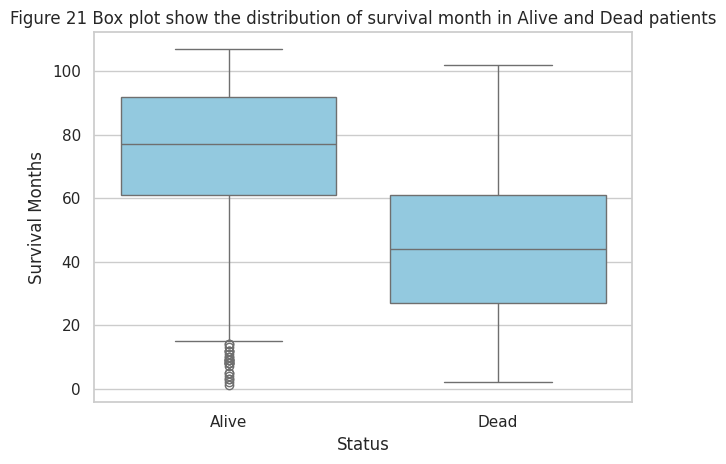

In [ ]:
# Box plot shows the relation of Reginol Node Positive, Positive_Node_Ratio, and survival features
sns.boxplot(data=df_encoded, x='Status', y='Survival Months', color='skyblue')
plt.title('Figure 21 Box plot show the distribution of survival month in Alive and Dead patients')
plt.xlabel('Status')
plt.ylabel('Survival Months')

# Show and save the figure
plt.tight_layout()
plt.savefig('Figure 21 Box plot show the distribution of survival month in status.png', dpi=300)
plt.show()

<ipython-input-125-a0e57587d7d9>:17: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



<Figure size 1400x1000 with 0 Axes>

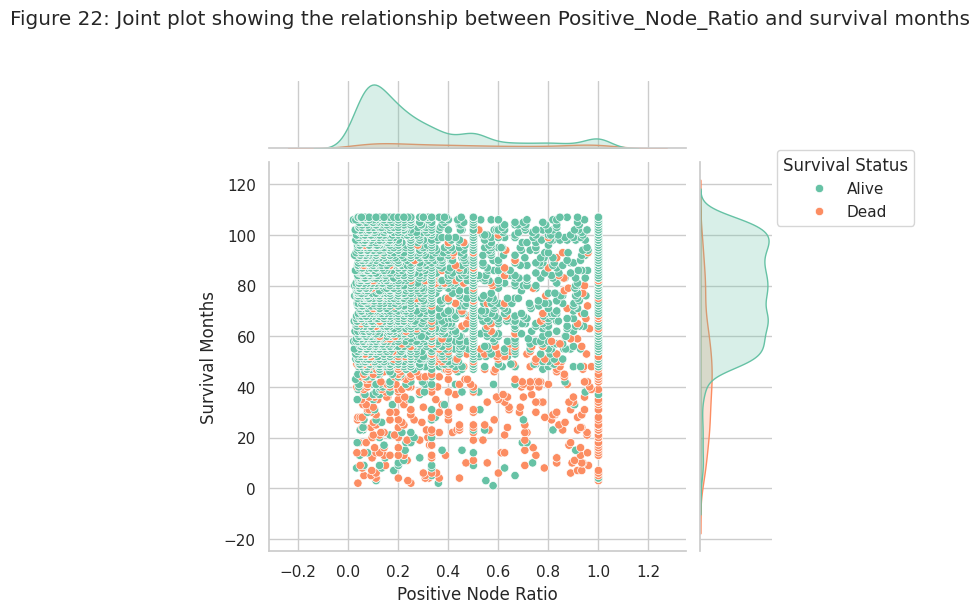

In [ ]:
# Joint Scatter and distribution plot shows the relation of Reginol Node Positive, Positive_Node_Ratio, and survival features
plt.figure(figsize=(14, 10))
joint = sns.jointplot(data=df_encoded, x='Positive_Node_Ratio', y='Survival Months', hue='Status', palette='Set2')

# Set title
joint.fig.suptitle('Figure 22: Joint plot showing the relationship between Positive_Node_Ratio and survival months', y=1.02)

# Adjust subplot spacing to make room for the title
plt.subplots_adjust(top=0.9)

# Customize axes labels and legend
plt.xlabel('Positive Node Ratio')
plt.ylabel('Survival Months')
lgd = plt.legend(title='Survival Status', bbox_to_anchor=(1.2, 1.05), loc='upper left')

# Save and show plot
plt.tight_layout()
plt.savefig('Figure 22 joint plot shows the Positive_Node_Ratio and survival months .png', dpi=300,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

From Figure 21, it's evident that there are more survival month records for alive patients.

In Figure 22, we observe that a larger proportion of alive patients are distributed among smaller positive node ratios and longer survival months. However, deaths also occur across a wide range of positive node ratios. Even at the highest ratio, which is one, both alive and dead patients are present, albeit with a higher proportion of alive patients. This complex joint plot indicates that alive patients tend to have smaller positive node ratios. However, it cannot be used as a prognostic marker, as dead patients are distributed across all ranges of positive node ratios.

# Extract Analysis

## 1. To further explore the relationship between hormone status, which plays a crucial role in patient diagnosis and treatment, and survival months, we conducted a weighted Kaplan-Meier analysis.

In [ ]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a64d1f50aa4065acf2ce71f8977c103a530fc4dc5c6c36c133790ff8abf16b93
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from lifelines import KaplanMeierFitter

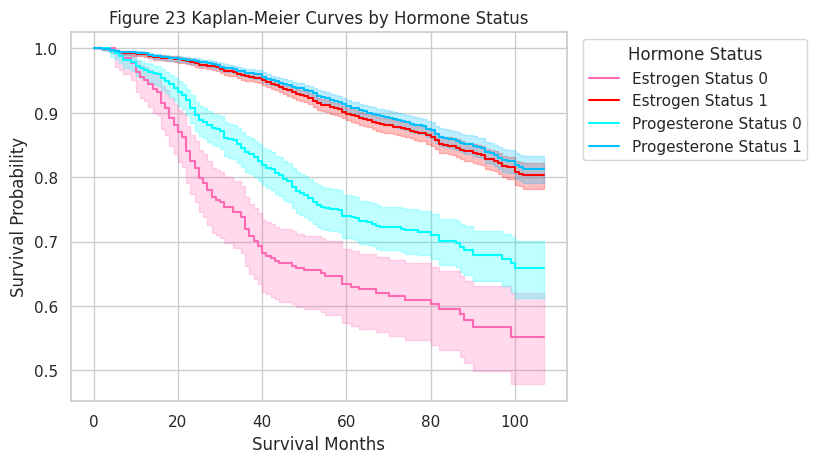

In [ ]:
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Filter the dataframe based on 'Estrogen Status_encoded' or 'Progesterone Status_encoded' column
estrogen_0 = df_encoded[df_encoded['Estrogen Status_encoded'] == 0]
estrogen_1 = df_encoded[df_encoded['Estrogen Status_encoded'] == 1]

progesterone_0 = df_encoded[df_encoded['Progesterone Status_encoded'] == 0]
progesterone_1 = df_encoded[df_encoded['Progesterone Status_encoded'] == 1]

# Fit the Kaplan-Meier curves
kmf.fit(durations=estrogen_0['Survival Months'], event_observed=estrogen_0['Status_encoded'], label='Estrogen Status 0')
ax = kmf.plot_survival_function(color='hotpink')

kmf.fit(durations=estrogen_1['Survival Months'], event_observed=estrogen_1['Status_encoded'], label='Estrogen Status 1')
kmf.plot_survival_function(ax=ax,color='red')

kmf.fit(durations=progesterone_0['Survival Months'], event_observed=progesterone_0['Status_encoded'], label='Progesterone Status 0')
ax = kmf.plot_survival_function(color='cyan')

kmf.fit(durations=progesterone_1['Survival Months'], event_observed=progesterone_1['Status_encoded'], label='Progesterone Status 1')
kmf.plot_survival_function(ax=ax,color='deepskyblue')

# Customize the plot
plt.xlabel('Survival Months')
plt.ylabel('Survival Probability')
plt.title('Figure 23 Kaplan-Meier Curves by Hormone Status')
plt.legend(title='Hormone Status',bbox_to_anchor=(1.5, 1), loc='upper right')

# Show the plot
plt.savefig('Figure 23 Kaplan-Meier Curves by Hormone Status', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

From the weighted Kaplan-Meier survival curve, it's evident that hormone status is a significant factor influencing survival time. A steeper slope indicates a higher event rate (death rate) and thus a poorer survival prognosis, while a flatter slope suggests a lower event rate and a better prognosis. The x-axis represents survival months, while the y-axis represents survival probability. Comparing Estrogen positive (1) in red to Estrogen negative (0) in pink, it's clear that Estrogen-negative patients have a lower probability of survival in the later months. Similar observations can be made for Progesterone status, where negative Progesterone patients exhibit a worse survival prognosis.

## 2. To delve deeper into the data and its diagnostic or predictive potential, we'll employ a logistic regression model to classify patients as alive or dead. We'll partition the data into training and testing sets. Initially, we'll apply Principal Component Analysis (PCA) to do dimension reduction and identify the principal components for model construction. Subsequently, we'll train and test the logistic regression model. Finally, we'll assess the model's explanatory power and performance.

### 2.1 PCA dimension reduction

In [ ]:
# Import the necessay dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. Define the feature matrix X and the target variable y
# The matrix X incudes the encoded or associated features
X = df_encoded[['Age', 'Tumor Size', 'Regional Node Examined', 'Positive_Node_Ratio', 'Race_Black', 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'Race_White',
                'Marital Status_Divorced', 'Marital Status_Married (including common law)', 'Marital Status_Separated', 'Marital Status_Single (never married)',
                'Marital Status_Widowed', 'A Stage_Distant', 'A Stage_Regional', 'T Stage_encoded', 'N Stage_encoded', '6th Stage_encoded', 'Grade_encoded', 'Estrogen Status_encoded', 'Progesterone Status_encoded']]

y = df_encoded['Status_encoded']


In [ ]:
# 2. Standardize the data of the features
# Create a StandardScaler object
scaler = StandardScaler()

scaler.fit(X)
scaled_data =scaler.transform(X)
display(scaled_data)


array([[-1.224048  ,  0.45092858,  0.5730864 , ..., -0.23601835,
         0.26768806,  0.45817553],
       [-0.77771925,  0.68768639,  1.31389717, ..., -0.23601835,
         0.26768806,  0.45817553],
       [ 1.4539245 , -0.25934485, -1.27894052, ...,  1.33081636,
         0.26768806,  0.45817553],
       ...,
       [-0.10822612, -1.01696984, -1.27894052, ..., -0.23601835,
        -3.73569141, -2.18256966],
       [ 0.67284919, -1.01696984, -0.04425591, ..., -0.23601835,
         0.26768806,  0.45817553],
       [ 0.89601356, -1.0643214 , -1.64934591, ..., -0.23601835,
         0.26768806,  0.45817553]])

In [ ]:
# 3. Use the PCA tech to fit the data. Try to seethe expanied variance of all components decomposition of all features then deternmin the number of principal components.
pca =PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#Check the column number before and after PCA
print("The shape of data before PCA")
display(scaled_data.shape)

print("-----------------------------------")
print("The shape of data after PCA")
display(x_pca.shape)

# View the explanied variance to justify the results
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_), 'Proportion of variance': pca.explained_variance_ratio_, 'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary_df.columns) + 1)]
display(pcaSummary_df.round(4))
print('The cumulative explained variation ratio for data is : {}'.format(np.cumsum(pca.explained_variance_ratio_)))


The shape of data before PCA


(4023, 20)

-----------------------------------
The shape of data after PCA


(4023, 20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Standard deviation,1.88,1.43,1.32,1.30,1.24,1.17,1.11,1.08,1.07,1.01,1.00,0.93,0.87,0.69,0.48,4.35e-01,2.05e-01,0.0,0.0,0.0
Proportion of variance,0.18,0.10,0.09,0.08,0.08,0.07,0.06,0.06,0.06,0.05,0.05,0.04,0.04,0.02,0.01,9.40e-03,2.10e-03,0.0,0.0,0.0
Cumulative proportion,0.18,0.28,0.37,0.45,0.53,0.60,0.66,0.71,0.77,0.82,0.87,0.92,0.95,0.98,0.99,9.98e-01,1.00e+00,1.0,1.0,1.0


The cumulative explained variation ratio for data is : [0.17658539 0.27838589 0.36576114 0.45062477 0.52728791 0.59550585
 0.6567848  0.7149614  0.77178239 0.82238499 0.87237121 0.91521199
 0.95298266 0.97687248 0.98844742 0.99789477 1.         1.
 1.         1.        ]


Based on the PCA explained variation and the cumulative explained variation ratio, the first 14 components account for approximately 98% of the total variation in the 20 variables. This indicates that these 13 components capture a significant portion of the original data's variability. As a result, we can use these first 14 components for the later regression analysis.

In [ ]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

display(X_train.shape)
display(X_test.shape)

(3218, 20)

(805, 20)

In [ ]:
# 5. Apply Principal Component Analysis (PCA) to reduce dimensionality:
pca = PCA(n_components=14)  # Use 14 principal components decomposition
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [ ]:
# Make predictions by using the test data
y_pred = model.predict(X_test_pca)


In [ ]:
# Evaluate the model's performance on the test set
print("Confusion Matrix:")
display(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Evaluate the model's performance on the training set
y_train_pred = model.predict(X_train_pca)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nThe performance on the training dataset is:")
print("--------------------------------------------")
print("Mean Squared Error for training dataset:", train_mse)
print("R-squared for training dataset:", train_r2)

# Evaluate the model's performance on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nThe performance on the testing dataset is:")
print("--------------------------------------------")
print("Mean Squared Error for test dataset:", test_mse)
print("R-squared for test dataset:", test_r2)


Confusion Matrix:


array([[651,  18],
       [114,  22]])


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       669
           1       0.55      0.16      0.25       136

    accuracy                           0.84       805
   macro avg       0.70      0.57      0.58       805
weighted avg       0.80      0.84      0.80       805


Accuracy: 0.8360248447204969

The performance on the training dataset is:
--------------------------------------------
Mean Squared Error for training dataset: 0.14201367308887508
R-squared for training dataset: -0.11899348672997312

The performance on the testing dataset is:
--------------------------------------------
Mean Squared Error for test dataset: 0.1639751552795031
R-squared for test dataset: -0.16789765233447662


From the model's performance for each class (status 0,Alive and Status class 1, dead):

1. Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model.

Here,
   (1) Precision for class 0 (Alive) is 0.85, which means that among all the instances predicted as survived, 85% of them are actually survived.
   (2)Precision for class 1 (Dead) is 0.55, indicating that among all the instances predicted as not survived, only 55% of them are actually not survived.

2. Recall: Recall, measures the proportion of true positive predictions among all actual positive instances.

Here
   (1) Recall for class 0 (Alive) is 0.97, suggesting that the model correctly identifies 97% of all actual survived instances.
   (2) Recall for class 1 (Dead) is 0.16, indicating that the model only captures 16% of all actual not survived instances.

3. F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

Here:
   (1) F1-score for class 0 (Alive) is 0.91, which represents the overall accuracy of the model in predicting survived instances.
   (2) F1-score for class 1 (Dead) is 0.25, reflecting the model's performance in predicting not survived instances.

Accuracy measures the overall correctness of the model's predictions across all classes. In this case, the model achieves an accuracy of 0.84, indicating that 84% of the predictions made by the model are correct.


Mean Squared Error (MSE) is a measure of the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance. R-squared (R^2) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Negative R-squared values suggest that the model does not fit the data well.

Here, both the training and testing datasets exhibit negative R-squared values, indicating that the model does not explain much of the variance in the data and does not fit the data well. This suggests that the model may not be capturing the underlying patterns in the data effectively.

Overall, this logistic regression model does provide the model for prediction but the model did not capture the patterns well especially in capturing the features of the "Dead" group.